In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt #import matplotlib library
from matplotlib.animation import FuncAnimation # import animations for matplotlib

from datetime import datetime, timedelta # datetime library

import pandas as pd # pandas library


from sqlalchemy.dialects.postgresql import JSON # Allows SQLAlchemy to parse the json from the postgresql db
from sqlalchemy import ( # Sqlaclhemy desired content
    MetaData,
    Table, Column,
    Integer, Numeric, String,
    DateTime, 
    ForeignKey, 
    Select,
    create_engine) 
from sqlalchemy.orm import sessionmaker # Sqlalchemy ORM desired content
from sqlalchemy.orm.exc import NoResultFound # Sqlalchemy NoResultFound

from time import sleep # sleep

In [4]:
 metadata = MetaData() # Set SQLAlchemy MetaData

In [5]:
# Obtain database password
dbpass = ''
with open('../lunacapture/.dbpass') as f:
    dbpass = f.readlines()

In [6]:
# Create the SQLAlchemy Engine
engine = create_engine('postgresql://postgres:' + dbpass[0] + '@localhost:5432/test_cpp')

In [7]:
# Create the connection to the engine
connection = engine.connect()

In [8]:
# Create a SQLAlchemy Session
Session = sessionmaker(bind = engine)
session = Session()

In [9]:
# Build a SQLAlchemy model of the PostgreSQL database
test_conn = Table('test_conn', metadata,
                  Column('id', Integer(), primary_key=True),
                  Column('instance_num', Integer()),
                  Column('robot_json', JSON),
                  Column('created_at', DateTime(timezone=False), default=datetime.now, onupdate=datetime.now))

In [10]:
# List of possible data points to observe
data_record_names = [
    'boom',
    'drive_encoder_left',
    'drive_encoder_right',
    'dump',
    'epoch_time',
    'fork',
    'frame_vibe',
    'load_dump',
    'load_tool',
    'loc_angle',
    'loc_x',
    'loc_y',
    'power_boom',
    'power_dump',
    'power_fork',
    'power_left',
    'power_right',
    'power_spin',
    'power_stick',
    'power_tilt',
    'power_tool',
    'spin',
    'state_state',
    'stick',
    'tilt',
    'tool_vibe'
]

In [13]:
sub_plot_0_name = data_record_names[18]
sub_plot_1_name = data_record_names[23]
sub_plot_2_name = data_record_names[8]

In [14]:
print("Sub Plot 1: ", sub_plot_0_name, "\nSub Plot 2: ", sub_plot_1_name, "\nSub Plot 3: ", sub_plot_2_name)

Sub Plot 1:  power_stick 
Sub Plot 2:  stick 
Sub Plot 3:  load_tool


In [15]:
# Create an empty pandas dataframe with columns to match
df = pd.DataFrame()

df['id'] = ''
df['instance_num'] = ''
df[sub_plot_0_name] = ''
df[sub_plot_1_name] = ''
df[sub_plot_2_name] = ''
df['datetime_database'] = ''

In [16]:
def print_data(show_print, results):
    if (not show_print):
        return
    else:
        for result in results:
            print(result[0], ", ", result[1], ", ", result[2][sub_plot_0_name], ", ", result[2][sub_plot_1_name], ", ", result[2][sub_plot_2_name], ", ", result[3])
        return

In [17]:
def obtain_instance_num():
    results = session.query(test_conn).order_by(test_conn.c.id.desc()).first()
    return results[1]

In [18]:
# To have the most recent instance_num variable for this session, use the following function
# curr_instance_num = obtain_instance_num()

# To set an instance_num variable manually, 
curr_instance_num = 2
print(curr_instance_num)

2


In [19]:
def retrieve_data(show_print):
    # Prepare to select from the test_conn table
    results = None
    
    if df.empty:
        s = test_conn.select().where(test_conn.c.instance_num == curr_instance_num)
        rp = connection.execute(s)
        results = rp.fetchall()
        if (results == None):
            raise SystemExit("The postgresql database is empty.")
        print_data(show_print, results)
    else:
        results = session.query(test_conn).filter(test_conn.c.instance_num == curr_instance_num).order_by(test_conn.c.id.desc()).first()
        if (results == None):
            raise SystemExit("The postgresql database is empty.")
        print_data(show_print, [results])    

    # If the dataframe is empty, add this first result 
    if (len(df) == 0):
        # To Do: Lift below into its own function, so as not to repeat
        for result in results:
            df.loc[len(df)] = [result[0], result[1], result[2][sub_plot_0_name], result[2][sub_plot_1_name], result[2][sub_plot_2_name], result[3]]    
    
    # Otherwise, only add if the id in the result is different from the last id in dataframe 
    elif (results[0] != df.iloc[-1]['id']):
        df.loc[len(df)] = [results[0], results[1], results[2][sub_plot_0_name], results[2][sub_plot_1_name], results[2][sub_plot_2_name], results[3]]    

In [20]:
print(df['datetime_database'])

Series([], Name: datetime_database, dtype: object)


In [21]:
retrieve_data(True)

4 ,  2 ,  0.0 ,  0.0 ,  0.0 ,  2023-06-05 16:10:57.265678


In [22]:
df.describe()

,id,instance_num,power_stick,stick,load_tool
count,1.0,1.0,1.0,1.0,1.0
mean,4.0,2.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,4.0,2.0,0.0,0.0,0.0
25%,4.0,2.0,0.0,0.0,0.0
50%,4.0,2.0,0.0,0.0,0.0
75%,4.0,2.0,0.0,0.0,0.0
max,4.0,2.0,0.0,0.0,0.0


In [149]:
def update_graph_length(graph_initial_cell, graph_x_length):
    if (len(df) > graph_x_length):
        graph_initial_cell = len(df) - graph_x_length
    return graph_initial_cell

<IPython.core.display.Javascript object>


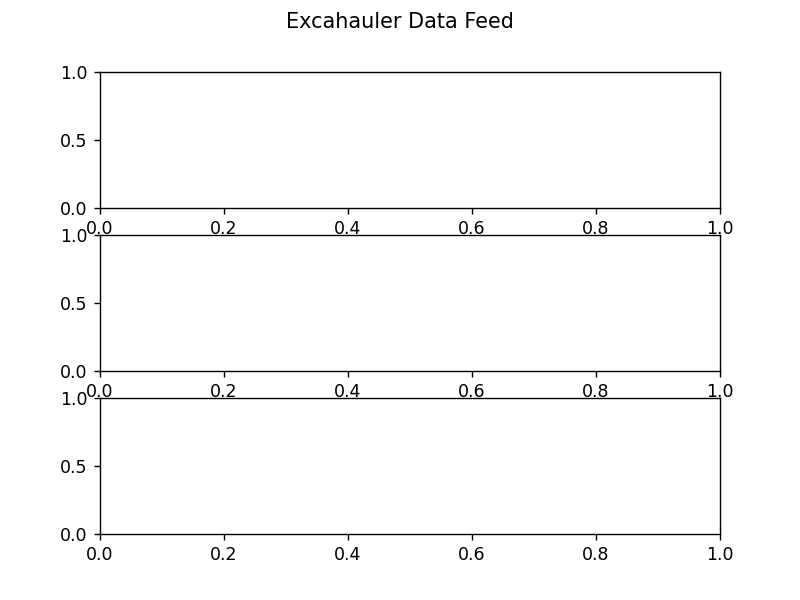

In [150]:
fig, axs = plt.subplots(3)
fig.suptitle("Excahauler Data Feed")
plt.ion()

fig.show()
fig.canvas.draw()

In [151]:
# Initialize the graph starting point at 0
graph_initial_cell = 0

# Set the intended graph length
graph_x_length = 367

In [152]:
print(df)

       id  instance_num  epoch_time  stick  load_tool  \
0    1547            12  1723355148   5.09      -0.28   
1    1548            12  1723355185   5.09      -0.27   
2    1549            12  1723355216   5.09      -0.27   
3    1550            12  1723355249   5.08      -0.27   
4    1551            12  1723355282   5.08      -0.27   
..    ...           ...         ...    ...        ...   
362  1909            12  1723366920   2.82      -0.23   
363  1910            12  1723366953   2.82      -0.23   
364  1911            12  1723366986   2.81      -0.23   
365  1912            12  1723367019   2.80      -0.23   
366  1913            12  1723367052   2.80      -0.23   

             datetime_database  
0   2023-05-29 00:55:35.180643  
1   2023-05-29 00:55:35.217339  
2   2023-05-29 00:55:35.249262  
3   2023-05-29 00:55:35.282165  
4   2023-05-29 00:55:35.315279  
..                         ...  
362 2023-05-29 00:55:46.953183  
363 2023-05-29 00:55:46.986338  
364 2023-05-29 00:

In [66]:
# Endless while loop to display graph
while True:
    retrieve_data(False)
    
    axs[0].clear()
    axs[1].clear()
    axs[2].clear()
    
    graph_initial_cell = update_graph_length(graph_initial_cell, graph_x_length)
    
    axs[0].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_0_name])
    axs[1].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_1_name])
    axs[2].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_2_name])

    
#     axs[0].set_title(sub_plot_0_name, rotation=90, x=-0.2, y=0.1)
#     axs[1].set_title(sub_plot_1_name, rotation=90, x=-0.2, y=0.1)
#     axs[2].set_title(sub_plot_2_name, rotation=90, x=-0.2, y=0.1)
    
    fig.tight_layout(pad=2.0)
    
    fig.canvas.draw()
    
    sleep(500/1000)
    # clear_output(wait=True)

KeyboardInterrupt: 